# PRCP-1000 
### Portuguese Bank Marketing Project
#### Team Members: Prabhati Acharya, Sushree Sarangi, Vartika Vishnoi, and Vivek Viswanathan

##### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import itertools
import pydotplus
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree

import warnings
warnings.simplefilter('ignore')

In [2]:
rand_state = 10
n_iterations = 5

In [3]:
# Load the data

Project_Data = pd.read_csv('../../Data/bank-full.csv', sep=';')

In [4]:
Project_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
Project_Data.shape

(45211, 17)

In [6]:
Project_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
Project_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
Project_Data.nunique(dropna=False)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
# Review the Categorical variables. 
### No transformation required for the categorical variables.
### We will identify candidates for one-hot encoding later in the process.

#print('\nUnique values of Project_Data.age:: \n',Project_Data.age.value_counts(dropna = False))
print('\nUnique values of Project_Data.job:: \n',Project_Data.job.value_counts(dropna = False))
print('\nUnique values of Project_Data.marital:: \n',Project_Data.marital.value_counts(dropna = False))
print('\nUnique values of Project_Data.education:: \n',Project_Data.education.value_counts(dropna = False))
print('\nUnique values of Project_Data.default:: \n',Project_Data.default.value_counts(dropna = False))
print('\nUnique values of Project_Data.housing:: \n',Project_Data.housing.value_counts(dropna = False))
print('\nUnique values of Project_Data.loan:: \n',Project_Data.loan.value_counts(dropna = False))
print('\nUnique values of Project_Data.contact:: \n',Project_Data.contact.value_counts(dropna = False))
print('\nUnique values of Project_Data.day:: \n',Project_Data.day.value_counts(dropna = False))
print('\nUnique values of Project_Data.month:: \n',Project_Data.month.value_counts(dropna = False))
#print('\nUnique values of Project_Data.campaign:: \n',Project_Data.campaign.value_counts(dropna = False))
#print('\nUnique values of Project_Data.previous:: \n',Project_Data.previous.value_counts(dropna = False))
print('\nUnique values of Project_Data.poutcome:: \n',Project_Data.poutcome.value_counts(dropna = False))
print('\nUnique values of Project_Data.y:: \n',Project_Data.y.value_counts(dropna = False))


Unique values of Project_Data.job:: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Unique values of Project_Data.marital:: 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Unique values of Project_Data.education:: 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Unique values of Project_Data.default:: 
 no     44396
yes      815
Name: default, dtype: int64

Unique values of Project_Data.housing:: 
 yes    25130
no     20081
Name: housing, dtype: int64

Unique values of Project_Data.loan:: 
 no     37967
yes     7244
Name: loan, dtype: int64

Unique values of Project_Data.contact:: 
 cellular     29285
unknown      13020
telephone     2906
Name: contac

In [10]:
# Converted target variable from yes and no to 1 and 0

Project_Data.y = Project_Data.y.map(dict(yes=1, no=0))

In [11]:
X_DT = Project_Data.drop(columns=['y'], axis=1)
y_DT = Project_Data.y

In [12]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y_DT, test_size=0.25, random_state=10)

# One Hot encoding for Categorical Variables

One Hot Encoding (ohe) is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.

#### Options used for pd.get_dummies
- data - Data of which to get dummy indicators 
    - Project_Data_drop_na
- prefix_sep - If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.
    - "__"
- drop_first - Whether to get k-1 dummies out of k categorical levels by removing the first level
    - True
- columns - Column names in the DataFrame to be encoded.
    - cat_columns - List of Categorical features to passed through ohe

In [13]:
# Listing Categorical Columns and creating One hot encoding for those variables

cat_columns = ['job', 'marital', 'education', 
               'default', 'housing', 'loan', 
               'contact', 'month', 'poutcome']

In [14]:
Project_Data_ohe = pd.get_dummies(Project_Data, prefix_sep="__", drop_first=True, columns=cat_columns)

In [15]:
Project_Data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   45211 non-null  int64
 1   balance               45211 non-null  int64
 2   day                   45211 non-null  int64
 3   duration              45211 non-null  int64
 4   campaign              45211 non-null  int64
 5   pdays                 45211 non-null  int64
 6   previous              45211 non-null  int64
 7   y                     45211 non-null  int64
 8   job__blue-collar      45211 non-null  uint8
 9   job__entrepreneur     45211 non-null  uint8
 10  job__housemaid        45211 non-null  uint8
 11  job__management       45211 non-null  uint8
 12  job__retired          45211 non-null  uint8
 13  job__self-employed    45211 non-null  uint8
 14  job__services         45211 non-null  uint8
 15  job__student          45211 non-null  uint8
 16  job_

# Scaling the data set

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm. The Features have been scaled to a mean of 0 and variance of 1 to improve accuracy of the classification models.

*fit_transform* within MinMaxScaler() function fits to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [16]:
scaler = MinMaxScaler()

In [17]:
Project_Data_ohe_scaled = pd.DataFrame(scaler.fit_transform(Project_Data_ohe), columns=Project_Data_ohe.columns)

In [18]:
Project_Data_ohe_scaled.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job__blue-collar,job__entrepreneur,...,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__other,poutcome__success,poutcome__unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110,0.116985,0.215257,0.032890,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376,0.321406,0.411005,0.178351,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Matrix

We used correlation plot to identify the attributes in the original dataset that appeared to be highly collinear. In other words, one predictor variable in the regression model can be linearly predicted from the others with a substantial degree of accuracy.

corr = 1 were excluded to avoid displaying self correlated features.

In [19]:
corr = Project_Data_ohe_scaled.corr()

kot = corr[(corr>=.8) & (corr<1)]
kot.dropna(axis=0, how='all', inplace = True)
kot.dropna(axis=1, how='all', inplace = True)
#plt.figure(figsize=(12,8))
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', linewidths=3, linecolor='black')

matrix = np.triu(kot)
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', mask = matrix)

### Highly Correlated variables

- Based on the above analysis, there aren't any highly correlated variables in the data set.
- We can now proceed with the models.

In [20]:
kot

""


# SMOTE

In [21]:
X = Project_Data_ohe_scaled.drop(columns=['y'], axis=1)
y = Project_Data_ohe_scaled.y
smote = SMOTE()
X_smote, y_smote = smote.fit_sample(X.astype('float'), y)

In [22]:
sum(Project_Data_ohe_scaled['y']==0)/sum(Project_Data_ohe_scaled['y']==1)

7.548118737001324

In [23]:
sum(y_smote==0)/sum(y_smote==1)

1.0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=rand_state)

In [25]:
sum(y_test==0)/sum(y_test==1)

0.9962996299629963

In [26]:
sum(y_train==0)/sum(y_train==1)

1.0012365070347224

#### Set Baseline of the Cost Model

We start with executing selective models with default parameters on the complete data set. The confusion matrix along with the classification report and the accuracy of the model is printed below. The function confusion_mat displays the confusion matrix (using pd.crosstab) and classification report. It additionally extracts the FP and FN case counts and calculates the cost to the business partner.

### K-fold Cross-Validation

This is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and test set. In cross-validation, the data set is split multiple times and the model is trained on each of these splits. For our analysis, we will be using k-fold cross-validation. 

KFold divides all the samples in groups of samples, called folds (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using folds, and the fold left out is used for test.

Parameters for k-fold CV:
- n_splitsint - Number of folds
    - 5
- random_state - random_state is the seed used by the random number generator
    - 10

In [27]:
cv = KFold(n_splits=n_iterations, random_state=rand_state)

In [28]:
results_df = pd.DataFrame(columns=['Classifier', 'Features', 'Accuracy', 'Parameters', 'Recall', 
                                   'Precision', 'FPR', 'TPR', 'AUC', 'True_Positives', 
                                   'True_Negatives', 'False_Positives', 'False_Negatives', 'Cost'])
results_df

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost


In [29]:
def confusion_mat(y_test, y_pred):
    print('Confusion Matrix::\n')
    print(pd.crosstab(y_test, y_pred))
    print()
    print('Classification Report::')
    print(classification_report(y_test, y_pred))
    TN = pd.crosstab(y_test, y_pred).iloc[0, 0]
    FP = pd.crosstab(y_test, y_pred).iloc[0, 1]
    FN = pd.crosstab(y_test, y_pred).iloc[1, 0]
    TP = pd.crosstab(y_test, y_pred).iloc[1, 1]
    Cost = (FP*10)+(FN*500)
    Recall = recall_score(y_test, y_pred, average='weighted')
    Precision = precision_score(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    return(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision)

In [30]:
clfsDict = {'Logistic Regression': LogisticRegression(solver = 'lbfgs', random_state=rand_state),
#            'SVM (SVC)': SVC(gamma = 0.5, random_state=rand_state, probability=True), 
            'Gaussian Naive-Bayes': GaussianNB(),
            'Bernoulli Naive-Bayes': BernoulliNB(),
            'Decision Tree': DecisionTreeClassifier(random_state=rand_state),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=rand_state),
            'XGB': XGBClassifier(random_state=rand_state)}

In [31]:
for mdl, clf in clfsDict.items():
    start_1 = time()
    acc = cross_val_score(clf,X,y=y,cv=cv)
    clf.fit(X_train, y_train)
    y_pred_full_data = clf.predict(X_test)
    y_pred_proba_full_data = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_full_data)
    auc = roc_auc_score(y_test, y_pred_proba_full_data)
    (FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_full_data)
    results_df = results_df.append({'Classifier':mdl
                                    , 'Features':'Full'
                                    , 'Parameters': 'Default'
                                    , 'Accuracy': Accuracy
                                    , 'Recall': Recall
                                    , 'Precision': Precision
                                    , 'FPR': fpr
                                    , 'TPR': tpr
                                    , 'AUC': auc
                                    , 'True_Positives': TP
                                    , 'True_Negatives': TN
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )
    print()
    print('Process Time:: %0f' %(time()-start_1))
    print()

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    8524  1438
1.0    1419  8580

Classification Report::
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      9962
         1.0       0.86      0.86      0.86      9999

    accuracy                           0.86     19961
   macro avg       0.86      0.86      0.86     19961
weighted avg       0.86      0.86      0.86     19961


Process Time:: 2.649984

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    8754  1208
1.0    4385  5614

Classification Report::
              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76      9962
         1.0       0.82      0.56      0.67      9999

    accuracy                           0.72     19961
   macro avg       0.74      0.72      0.71     19961
weighted avg       0.74      0.72      0.71     19961


Process Time:: 0.593160

Confusion Matrix::

col_0   0.0   1.0
y                
0.0 

NameError: name 'model_run_stats' is not defined

In [32]:
results_df

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost
0,Logistic Regression,Full,0.856871,Default,0.856871,0.856458,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",0.925021,8580,8524,1438,1419,723880
1,Gaussian Naive-Bayes,Full,0.719804,Default,0.719804,0.822926,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",0.816354,5614,8754,1208,4385,2204580
2,Bernoulli Naive-Bayes,Full,0.665147,Default,0.665147,0.690058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",0.732079,6018,7259,2703,3981,2017530
3,Decision Tree,Full,0.903412,Default,0.903412,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
4,Random Forest,Full,0.945394,Default,0.945394,0.926881,"[0.0, 0.0, 0.0001003814495081309, 0.0001003814...","[0.0, 0.10481048104810481, 0.2003200320032003,...",0.990233,9672,9199,763,327,171130
5,XGB,Full,0.947999,Default,0.947999,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470


# Feature Reduction (RFECV)

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets. We have used Recursive Feature Elimination with Cross-Validation to limit the number of features input to the model.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

Parameters for RFECV:
- estimator - A supervised learning estimator with a fit method that provides information about feature importance.
    - RandomForestClassifier
- step - If greater than or equal to 1, then step corresponds to the number of features to remove at each iteration.
    - 4
- cv - Determines the cross-validation splitting strategy. Integer value specifies the number of folds.
    - 3
- scoring - A scoring method to determine which score to maximize
    - recall

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=rand_state)
selector = RFECV(estimator=clf, step = 4, cv=3, scoring='accuracy')

In [34]:
#%%time

feature_fit = selector.fit(X_train, y_train)

print('The number of selected features with CV:: ', feature_fit.n_features_)
print('Selected Features:: ', X_train.columns[selector.support_])

The number of selected features with CV::  42
Selected Features::  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job__blue-collar', 'job__entrepreneur', 'job__housemaid',
       'job__management', 'job__retired', 'job__self-employed',
       'job__services', 'job__student', 'job__technician', 'job__unemployed',
       'job__unknown', 'marital__married', 'marital__single',
       'education__secondary', 'education__tertiary', 'education__unknown',
       'default__yes', 'housing__yes', 'loan__yes', 'contact__telephone',
       'contact__unknown', 'month__aug', 'month__dec', 'month__feb',
       'month__jan', 'month__jul', 'month__jun', 'month__mar', 'month__may',
       'month__nov', 'month__oct', 'month__sep', 'poutcome__other',
       'poutcome__success', 'poutcome__unknown'],
      dtype='object')


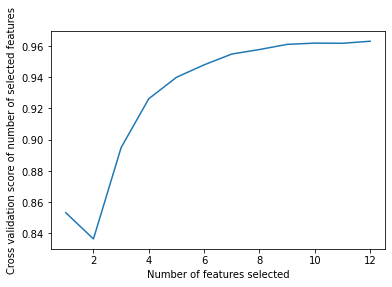

In [35]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [36]:
selector.grid_scores_

array([0.85322331, 0.83644684, 0.89493031, 0.92621068, 0.93991235,
       0.94789958, 0.95481738, 0.95769137, 0.96099992, 0.961802  ,
       0.9617017 , 0.96300505])

In [37]:
X_train_reduced_features = X_train[X_train.columns[selector.support_]]
X_test_reduced_features = X_test[X_test.columns[selector.support_]]

In [38]:
X_train_reduced_features.head(2)

,age,balance,day,duration,campaign,pdays,previous,job__blue-collar,job__entrepreneur,job__housemaid,...,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__other,poutcome__success,poutcome__unknown
38718,0.194805,0.081247,0.466667,0.033144,0.064516,0.412844,0.003636,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33666,0.207792,0.075572,0.633333,0.043107,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X_test_reduced_features.head(2)

,age,balance,day,duration,campaign,pdays,previous,job__blue-collar,job__entrepreneur,job__housemaid,...,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__other,poutcome__success,poutcome__unknown
55580,0.313501,0.074246,0.966667,0.136682,0.009227,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68744,0.201974,0.073975,0.069653,0.047922,0.001445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train the model on the reduced features

In this section all models use the default parameters to establish the baseline with reduced features before we tune the parameters using Randomized Search.

### Decision Tree

Decision trees can be applied to both regression and classification problems. While a regression tree is used to predict a quantitative response, a classification tree is used to predict a qualitative one. This algorithm constructs a tree from a training dataset in which each node is an attribute and branches are the corresponding values.

In [40]:
clf_DT_default = DecisionTreeClassifier(random_state=rand_state)
clf_DT_default.fit(X_train_reduced_features, y_train)
y_pred = clf_DT_default.predict(X_test_reduced_features)

y_pred_proba = clf_DT_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'Decision Tree'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    8951  1011
1.0     917  9082

Classification Report::
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      9962
         1.0       0.90      0.91      0.90      9999

    accuracy                           0.90     19961
   macro avg       0.90      0.90      0.90     19961
weighted avg       0.90      0.90      0.90     19961



### Random Forest

Decision trees form the basis for Random Forests. Random Forest is an ensemble of decision trees trained via bagging method. The Random Forest algorithm introduces randomness when growing trees and rather than search for the best feature when splitting a node, it searches for the best feature among a random subset of features. It yeilds a better model by trading a higher bias for a lower variance. Random Forests are also very helpful to get a good understanding of feature importance when we need to perform feature selection.

In [41]:
clf_RF_default = RandomForestClassifier(random_state=rand_state)
clf_RF_default.fit(X_train_reduced_features, y_train)
y_pred = clf_RF_default.predict(X_test_reduced_features)

y_pred_proba = clf_RF_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'Random Forest'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    9199   763
1.0     327  9672

Classification Report::
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      9962
         1.0       0.93      0.97      0.95      9999

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961



### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [42]:
clf_XGB_default = XGBClassifier(random_state=rand_state)
clf_XGB_default.fit(X_train_reduced_features, y_train)
y_pred = clf_XGB_default.predict(X_test_reduced_features)

y_pred_proba = clf_XGB_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'XGB'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    9465   497
1.0     541  9458

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      9962
         1.0       0.95      0.95      0.95      9999

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961



In [43]:
results_df

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost
0,Logistic Regression,Full,0.856871,Default,0.856871,0.856458,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",0.925021,8580,8524,1438,1419,723880
1,Gaussian Naive-Bayes,Full,0.719804,Default,0.719804,0.822926,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",0.816354,5614,8754,1208,4385,2204580
2,Bernoulli Naive-Bayes,Full,0.665147,Default,0.665147,0.690058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",0.732079,6018,7259,2703,3981,2017530
3,Decision Tree,Full,0.903412,Default,0.903412,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
4,Random Forest,Full,0.945394,Default,0.945394,0.926881,"[0.0, 0.0, 0.0001003814495081309, 0.0001003814...","[0.0, 0.10481048104810481, 0.2003200320032003,...",0.990233,9672,9199,763,327,171130
5,XGB,Full,0.947999,Default,0.947999,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470
6,Decision Tree,Reduced,0.903412,Default,0.903412,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
7,Random Forest,Reduced,0.945394,Default,0.945394,0.926881,"[0.0, 0.0, 0.0001003814495081309, 0.0001003814...","[0.0, 0.10481048104810481, 0.2003200320032003,...",0.990233,9672,9199,763,327,171130
8,XGB,Reduced,0.947999,Default,0.947999,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470


# RandomizedSearchCV to choose best parameters

In RandomizedSearchCV all hyperparameter values are not tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

#### Options for RandomizedSearchCV
- estimator - A object of that type is instantiated for each grid point.
    - Assigned as per the algorithm we are tuning
- param_distributions - Dictionary with parameters names (string) as keys and distributions or lists of parameters to try.
    - Assigned as per the algorithm we are tuning
- scoring - A single string to evaluate the predictions on the test set.
    - ['precision' , 'recall' , 'accuracy']
- cv - Determines the cross-validation splitting strategy.
    - 5
- refit - Refit an estimator using the best found parameters on the whole dataset.
    - recall
n_iterint - Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
    - 10

In [44]:
scores = ['precision'
          , 'recall'
          , 'accuracy'
         ]

In [45]:
def report_perf(clf, n_top = 3, clf_name = "", verbose=True):
    if(verbose):
        for n in range(1, n_top+1):
            candidates = np.flatnonzero(clf.cv_results_['rank_test_recall'] == n)
            for candidate in candidates:
                print('Model with rank: {0}'.format(n))
                print('Mean validation score (Recall on Test): {0:.3f} (std: {1:.3f})'.format(
                    clf.cv_results_['mean_test_recall'][candidate], clf.cv_results_['std_test_recall'][candidate]))
                print('ParametersL {0}',format(clf.cv_results_['params'][candidate]))
    return{'Classifier': clf_name
           , 'Best_Parameters': str(clf.best_params_)
           , 'Best_Estimator': str(clf.best_estimator_)
#           , 'Accuracy_Mean':clf.cv_results_['mean_test_acc'][clf.best_index_]
#           , 'Accuracy_std':clf.cv_results_['std_test_acc'][clf.best_index_]
           , 'Precision_Mean':clf.cv_results_['mean_test_precision'][clf.best_index_]
           , 'Precision_std':clf.cv_results_['std_test_precision'][clf.best_index_]
           , 'Recall_Mean':clf.cv_results_['mean_test_recall'][clf.best_index_]
           , 'Recall_std':clf.cv_results_['std_test_recall'][clf.best_index_]
          }

# Decision Tree

We are tuning for the following parameters for *Decision Tree Classifier*:
- max_depth: The maximum depth of the tree.
    - [10, 20, 30, None]
- max_features: The number of features to consider when looking for the best split
    - ['auto', 'sqrt']
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    - ['gini','entropy']
- min_samples_leaf: The minimum number of samples required to be at a leaf node.  
    - [1, 2, 4]
- min_samples_split: The minimum number of samples required to split an internal node
    - [2, 5, 10]
- random_state - If int, random_state is the seed used by the random number generator
    - 10

In [46]:
tuned_parameters_DT={'max_depth': [10, 20, 30, None]
                     , 'max_features': ['auto', 'sqrt']
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 2, 4]
                     , 'min_samples_split': [2, 5, 10]
                    }

clf_DT = DecisionTreeClassifier(random_state=rand_state)

In [47]:
#%%time

random_search_DT = RandomizedSearchCV(estimator=clf_DT
                                      , param_distributions=tuned_parameters_DT
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )

In [48]:
random_search_DT.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=10,
            

In [49]:
DT_report = report_perf(random_search_DT, n_top = 3, clf_name='Decision_Tree')
DT_report

Model with rank: 1
Mean validation score (Recall on Test): 0.883 (std: 0.008)
ParametersL {0} {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Model with rank: 2
Mean validation score (Recall on Test): 0.883 (std: 0.005)
ParametersL {0} {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}
Model with rank: 3
Mean validation score (Recall on Test): 0.882 (std: 0.005)
ParametersL {0} {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini'}


{'Classifier': 'Decision_Tree',
 'Best_Parameters': "{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}",
 'Best_Estimator': "DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',\n                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=2, min_samples_split=5,\n                       min_weight_fraction_leaf=0.0, presort='deprecated',\n                       random_state=10, splitter='best')",
 'Precision_Mean': 0.8766582414394242,
 'Precision_std': 0.005610426979427394,
 'Recall_Mean': 0.8827987973498809,
 'Recall_std': 0.007861642181056462}

# Random Forest

We are tuning the following parameters for Random Forest Classifier:
- n_estimators: The number of trees in the forest.
    - [100, 200]
- max_depth: The maximum depth of the tree.
    - [25, 50, None]
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    - ['gini','entropy']
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
    - [1, 25, 50]
- max_features: The number of features to consider when looking for the best split.
    - [.2, .3, 'auto']
- min_samples_split: The minimum number of samples required to split an internal node.
    - [2, 4, 8, 10, 12]

In [50]:
tuned_parameters_RF={'n_estimators':[100, 200]
                     , 'max_depth':[25, 50, None]
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 25, 50]
                     , 'max_features':[.2, .3, 'auto']
                     , 'min_samples_split':[2, 4, 8, 10, 12]
                    }

clf_RF = RandomForestClassifier(random_state=rand_state)

In [51]:
#%%time

random_search_RF = RandomizedSearchCV(estimator=clf_RF
                                      , param_distributions=tuned_parameters_RF
                                      , cv = 5
                                      , scoring = scores
                                      , refit = 'recall'
                                      , n_iter=10
                                     )

random_search_RF.fit(X_train_reduced_features, y_train)

RF_report = report_perf(random_search_RF, n_top = 3, clf_name='Random_Forest')

Model with rank: 1
Mean validation score (Recall on Test): 0.964 (std: 0.001)
ParametersL {0} {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': None, 'criterion': 'gini'}
Model with rank: 2
Mean validation score (Recall on Test): 0.961 (std: 0.000)
ParametersL {0} {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini'}
Model with rank: 3
Mean validation score (Recall on Test): 0.959 (std: 0.002)
ParametersL {0} {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': 25, 'criterion': 'entropy'}


In [52]:
RF_report

{'Classifier': 'Random_Forest',
 'Best_Parameters': "{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': None, 'criterion': 'gini'}",
 'Best_Estimator': "RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features=0.2,\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=200,\n                       n_jobs=None, oob_score=False, random_state=10, verbose=0,\n                       warm_start=False)",
 'Precision_Mean': 0.9159970588023562,
 'Precision_std': 0.0013312225794139296,
 'Recall_Mean': 0.9638405170680713,
 'Recall_std': 0.0013057309202374522}

# XGBoost

We are tuning the following parameters for XGBoost:
- n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.
    - [100, 150, 1000]
- learning_rate: Boosting learning rate (xgb’s “eta”)
    - [0.01, 0.6, None]
- subsample: Subsample ratio of the training instances.
    - [0.3, 0.9, None]
- max_depth: Maximum depth of a tree.
    - [3, 4, 5, 6, 7, 8, 9, None]
- colsample_bytree: The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    - [0.5, 0.9, None]
- min_child_weight: Minimum sum of instance weight (hessian) needed in a child.
    - [1, 2, 3, 4, None]

In [53]:
tuned_parameters_XGB={'n_estimators': [100, 150, 1000]
                      , 'learning_rate': [0.01, 0.6, None]
                      , 'subsample': [0.3, 0.9, None]
                      , 'max_depth': [3, 4, 5, 6, 7, 8, 9, None]
                      , 'colsample_bytree': [0.5, 0.9, None]
                      , 'min_child_weight': [1, 2, 3, 4, None]
                     }

clf_XGB = XGBClassifier(random_state=rand_state)

In [54]:
#%%time

random_search_XGB = RandomizedSearchCV(estimator=clf_XGB
                                      , param_distributions=tuned_parameters_XGB
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )

In [55]:
random_search_XGB.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.5, 0.9, None],
                                        '

In [56]:
XGB_report = report_perf(random_search_XGB, n_top = 3, clf_name='XGBoost')

Model with rank: 1
Mean validation score (Recall on Test): 0.946 (std: 0.001)
ParametersL {0} {'subsample': None, 'n_estimators': 100, 'min_child_weight': None, 'max_depth': 8, 'learning_rate': None, 'colsample_bytree': 0.9}
Model with rank: 2
Mean validation score (Recall on Test): 0.942 (std: 0.000)
ParametersL {0} {'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': None, 'learning_rate': None, 'colsample_bytree': 0.9}
Model with rank: 3
Mean validation score (Recall on Test): 0.939 (std: 0.002)
ParametersL {0} {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.6, 'colsample_bytree': None}


### Append random_state to the best parameters

We assign the best parameters from each of the Random Search to a variable and then add the random state parameter to it. These variables will be passed on to train the models with reduced features and best parameters.

In [57]:
DT_best_params = random_search_DT.best_params_
DT_best_params['random_state'] = rand_state

RF_best_params = random_search_RF.best_params_
RF_best_params['random_state'] = rand_state

XGB_best_params = random_search_XGB.best_params_
XGB_best_params['random_state'] = rand_state

### Train the model with the best parameters.

#### Decision Tree
- The best parameter (with random_state) from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [58]:
clf_DT_best = DecisionTreeClassifier(**DT_best_params)
clf_DT_best.fit(X_train_reduced_features, y_train)

y_pred_DT = clf_DT_best.predict(X_test_reduced_features)

y_pred_proba = clf_DT_best.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_DT)
results_df = results_df.append({'Classifier':'Decision Tree'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    8840  1122
1.0    1050  8949

Classification Report::
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      9962
         1.0       0.89      0.89      0.89      9999

    accuracy                           0.89     19961
   macro avg       0.89      0.89      0.89     19961
weighted avg       0.89      0.89      0.89     19961



#### Random Forest
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed

In [59]:
clf_RF_best = RandomForestClassifier(**RF_best_params)
clf_RF_best.fit(X_train_reduced_features, y_train)

y_pred_RF = clf_RF_best.predict(X_test_reduced_features)

y_pred_proba = clf_RF_best.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_RF)
results_df = results_df.append({'Classifier':'Random Forest'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    9171   791
1.0     333  9666

Classification Report::
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      9962
         1.0       0.92      0.97      0.95      9999

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961



#### XGBoost
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [60]:
clf_XGB_Best = XGBClassifier(**XGB_best_params)
clf_XGB_Best.fit(X_train_reduced_features, y_train)

y_pred_XGB = clf_XGB_Best.predict(X_test_reduced_features)

y_pred_proba = clf_XGB_Best.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_XGB)
results_df = results_df.append({'Classifier':'XGB'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost': Cost
                               }
                               , ignore_index=True
                              )

Confusion Matrix::

col_0   0.0   1.0
y                
0.0    9472   490
1.0     526  9473

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      9962
         1.0       0.95      0.95      0.95      9999

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961



In [61]:
results_df

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost
0,Logistic Regression,Full,0.856871,Default,0.856871,0.856458,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",0.925021,8580,8524,1438,1419,723880
1,Gaussian Naive-Bayes,Full,0.719804,Default,0.719804,0.822926,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",0.816354,5614,8754,1208,4385,2204580
2,Bernoulli Naive-Bayes,Full,0.665147,Default,0.665147,0.690058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",0.732079,6018,7259,2703,3981,2017530
3,Decision Tree,Full,0.903412,Default,0.903412,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
4,Random Forest,Full,0.945394,Default,0.945394,0.926881,"[0.0, 0.0, 0.0001003814495081309, 0.0001003814...","[0.0, 0.10481048104810481, 0.2003200320032003,...",0.990233,9672,9199,763,327,171130
5,XGB,Full,0.947999,Default,0.947999,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470
6,Decision Tree,Reduced,0.903412,Default,0.903412,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
7,Random Forest,Reduced,0.945394,Default,0.945394,0.926881,"[0.0, 0.0, 0.0001003814495081309, 0.0001003814...","[0.0, 0.10481048104810481, 0.2003200320032003,...",0.990233,9672,9199,763,327,171130
8,XGB,Reduced,0.947999,Default,0.947999,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470
9,Decision Tree,Reduced,0.891188,Best,0.891188,0.888591,"[0.0, 0.03844609516161413, 0.03844609516161413...","[0.0, 0.5021502150215021, 0.5042504250425043, ...",0.934030,8949,8840,1122,1050,536220


In [62]:
results_df.Accuracy = (results_df.True_Positives+results_df.True_Negatives)/\
(results_df.True_Positives+results_df.True_Negatives+\
 results_df.False_Positives+results_df.False_Negatives)

In [63]:
results_df.Recall = (results_df.True_Positives)/\
(results_df.True_Positives+results_df.False_Negatives)

In [64]:
results_df.Precision = (results_df.True_Positives)/\
(results_df.True_Positives+results_df.False_Positives)

In [75]:
results_df.sort_values(by='Accuracy', ascending='False').groupby('Classifier').head(1)

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost
2,Bernoulli Naive-Bayes,Full,0.665147,Default,0.60186,0.690058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",0.732079,6018,7259,2703,3981,2017530
1,Gaussian Naive-Bayes,Full,0.719804,Default,0.561456,0.822926,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",0.816354,5614,8754,1208,4385,2204580
0,Logistic Regression,Full,0.856871,Default,0.858086,0.856458,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",0.925021,8580,8524,1438,1419,723880
9,Decision Tree,Reduced,0.891188,Best,0.894989,0.888591,"[0.0, 0.03844609516161413, 0.03844609516161413...","[0.0, 0.5021502150215021, 0.5042504250425043, ...",0.934030,8949,8840,1122,1050,536220
10,Random Forest,Reduced,0.94369,Best,0.966697,0.924357,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010038...","[0.0, 0.057705770577057704, 0.1287128712871287...",0.989849,9666,9171,791,333,174410
5,XGB,Full,0.947999,Default,0.945895,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470


In [76]:
results_df_temp = results_df.sort_values(by='AUC', ascending='False').groupby('Classifier').head(1)

In [77]:
results_df_temp

,Classifier,Features,Accuracy,Parameters,Recall,Precision,FPR,TPR,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost
2,Bernoulli Naive-Bayes,Full,0.665147,Default,0.60186,0.690058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",0.732079,6018,7259,2703,3981,2017530
1,Gaussian Naive-Bayes,Full,0.719804,Default,0.561456,0.822926,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",0.816354,5614,8754,1208,4385,2204580
3,Decision Tree,Full,0.903412,Default,0.908291,0.899832,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",0.903403,9082,8951,1011,917,468610
0,Logistic Regression,Full,0.856871,Default,0.858086,0.856458,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",0.925021,8580,8524,1438,1419,723880
10,Random Forest,Reduced,0.94369,Best,0.966697,0.924357,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010038...","[0.0, 0.057705770577057704, 0.1287128712871287...",0.989849,9666,9171,791,333,174410
5,XGB,Full,0.947999,Default,0.945895,0.950075,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",0.990651,9458,9465,497,541,275470


In [67]:
roc_plot_df = results_df_temp[['Classifier', 'Features', 'Parameters', 
                               'AUC', 'FPR', 'TPR', 'Cost']].sort_values(by = 'AUC', 
                                                                         ascending=False)

In [68]:
roc_plot_df['Clf'] = roc_plot_df[['Classifier', 'Features', 'Parameters']].apply(lambda x: '_'.join(x), axis=1)

In [69]:
roc_plot_df

,Classifier,Features,Parameters,AUC,FPR,TPR,Cost,Clf
5,XGB,Full,Default,0.990651,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010001000100010001, 0.00030003000300...",275470,XGB_Full_Default
10,Random Forest,Reduced,Best,0.989849,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010038...","[0.0, 0.057705770577057704, 0.1287128712871287...",174410,Random Forest_Reduced_Best
0,Logistic Regression,Full,Default,0.925021,"[0.0, 0.0, 0.0, 0.0003011443485243927, 0.00030...","[0.0, 0.00010001000100010001, 0.00040004000400...",723880,Logistic Regression_Full_Default
3,Decision Tree,Full,Default,0.903403,"[0.0, 0.10148564545272033, 1.0]","[0.0, 0.9082908290829083, 1.0]",468610,Decision Tree_Full_Default
1,Gaussian Naive-Bayes,Full,Default,0.816354,"[0.0, 0.03212206384260189, 0.03232282674161815...","[0.0, 0.23512351235123513, 0.23612361236123613...",2204580,Gaussian Naive-Bayes_Full_Default
2,Bernoulli Naive-Bayes,Full,Default,0.732079,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000100381449508130...","[0.0, 0.00020002000200020003, 0.00040004000400...",2017530,Bernoulli Naive-Bayes_Full_Default


In [70]:
roc_plot_df.set_index('Classifier', inplace=True)

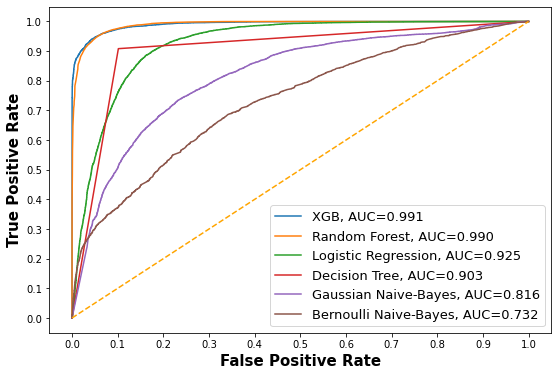

In [71]:
fig = plt.figure(figsize=(9,6))

for i in roc_plot_df.index:
    plt.plot(roc_plot_df.loc[i]['FPR'], 
             roc_plot_df.loc[i]['TPR'], 
             label="{}, AUC={:.3f}".format(i, roc_plot_df.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.rcParams.update({'figure.autolayout': True})

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15, fontweight="bold")

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15, fontweight="bold")

#plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC_Curve_Analysis.png')

plt.show()

In [72]:
df_results_temp_scatter = results_df_temp[(results_df_temp['Recall']>0.75) & (results_df_temp['Precision']>0.85)]
df_results_temp_scatter = df_results_temp_scatter.loc[:, ['Precision', 'Recall', 'Classifier']].sort_values(by='Precision')

In [73]:
df_results_temp_scatter

,Precision,Recall,Classifier
0,0.856458,0.858086,Logistic Regression
3,0.899832,0.908291,Decision Tree
10,0.924357,0.966697,Random Forest
5,0.950075,0.945895,XGB


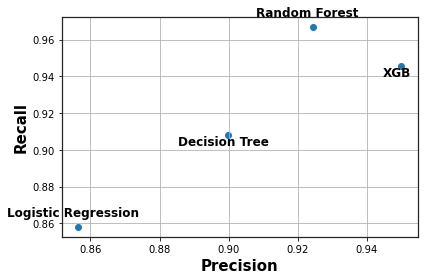

In [74]:
plt.clf()
temp=-1
temp_1=-1
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.scatter(df_results_temp_scatter.Precision, df_results_temp_scatter.Recall)
plt.grid()
for x,y,z in zip(df_results_temp_scatter.Precision, df_results_temp_scatter.Recall, df_results_temp_scatter.Classifier):
    temp_1 = temp_1*temp

    plt.annotate(z, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5*temp,11*temp_1), # distance from text to points (x,y)
                 fontweight="bold", 
                 fontsize = 12, 
                 ha='center') # horizontal alignment can be left, right or center

#plt.title("Precision vs. Recall", fontsize = 15, fontweight="bold")
plt.xlabel("Precision", fontsize=15, fontweight="bold")
plt.ylabel("Recall", fontsize=15, fontweight="bold")
plt.savefig('Precision_vs_Recall.png')
plt.show()

In [78]:
results_df_final = results_df_temp.iloc[:, [0,1,3,2,4,5,8,9,10,11,12,13]].sort_values(by='AUC', ascending=False)

In [79]:
results_df_final.to_excel("results_final.xlsx", sheet_name='Sheet_name_1')